In [3]:
import pandas as pd
from helpers import *

def od_xml_to_df(file_path):

    tree = ET.parse(file_path)
    root = tree.getroot()
    gt_od_df =  xml2df_str(root, 'tazRelation')
    
    gt_od_vals = gt_od_df['count'].astype(float)
    print('total GT demand: ',gt_od_vals.sum())

    return gt_od_df

In [4]:
base_path = '/Users/rodrse/Downloads/ForSergio_nov26_2023_final'
EDGE_OUT_STR = 'edge_data_SFO.xml'
SUMO_PATH = '/usr/local/opt/sumo/share/sumo'

taz2edge_xml = 'taz_new.xml'
net_xml = 'SFO.net.xml'
fixed_routes_xml = f'{base_path}/5hr_route_choice_set.csv'
od_duration_seconds = 5*60 

# duration of sample time for simulation output statistics
simulation_stat_freq_sec = od_duration_seconds
sim_end_time = od_duration_seconds
additional_xml = f'additional.add_statfreq{od_duration_seconds}.xml'

# suffix of simulation output edge file
EDGE_OUT_STR = 'edge_data_SFO.xml'
TRIPS2ODS_OUT_STR = 'trips.xml'
SUMO_PATH = '/usr/local/opt/sumo/share/sumo'
gt_version_str = 'v4'

# gt v4:
mean_od_val = 100
num_ods = 10

print('if you want to optimize them all (~86k) set num_ods as defined in commented line below')
#num_ods = routes_df.shape[0]

od_xml = f'gt_od_{gt_version_str}.xml'
file_gt = f'{base_path}/gt_od_{gt_version_str}.xml'
file_gt_edges = f'{base_path}/gt_edges_{gt_version_str}.csv'
prefix_output_gt = f'gt_{gt_version_str}'
# Get GT OD
print("Reading:",file_gt)
tree = ET.parse(file_gt)
root = tree.getroot()
gt_od_df =  xml2df_str(root, 'tazRelation')

gt_od_df.head()

print("Reading:",fixed_routes_xml)
routes_df = pd.read_csv(fixed_routes_xml, index_col=0)

gt_od_df = od_xml_to_df(file_gt)


sim_edge_out_gt = f'{base_path}/{prefix_output_gt}_{EDGE_OUT_STR}'
df_edge_gt, _, _ = parse_loop_data_xml_to_pandas(base_path, sim_edge_out_gt, prefix_output_gt,SUMO_PATH)
# picking at edges as GT edges
num_gt_edges = df_edge_gt.shape[0]
print("Number of GT edges:",num_gt_edges)
gt_edge_data = df_edge_gt\
    .sort_values(by=['interval_nVehContrib'], ascending=False)\
    .iloc[:num_gt_edges]

#gt_edge_data.shape




if you want to optimize them all (~86k) set num_ods as defined in commented line below
Reading: /Users/rodrse/Downloads/ForSergio_nov26_2023_final/gt_od_v4.xml
Reading: /Users/rodrse/Downloads/ForSergio_nov26_2023_final/5hr_route_choice_set.csv
total GT demand:  1044.3999999999999
Number of GT edges: 197


In [12]:
path_bo = "bayesian_optimization"
#bayes_opt_method = ["trust_region_bo","saasbo","vanilla_bo"]
bayes_opt_method = ["trust_region_bo_experiment_2","saasbo_experiment_2","vanilla_bo_experiment_2"]

bayes_opt_d = {}
for bo_ in bayes_opt_method:
    edge_epsilon_all = []
    curr_loss_list = []
    for o1 in range(100):
        curr_prefix = f'{bo_}/bayesOpt_{o1}'
        try:
            sim_edge_out = f'{base_path}/bayesian_optimization/{curr_prefix}_{EDGE_OUT_STR}'
            curr_loop_stats, _, _ = parse_loop_data_xml_to_pandas(
                base_path + "/bayesian_optimization", sim_edge_out, curr_prefix,SUMO_PATH
            )

        except:
            print("No run exist")
            break
        else:
            curr_loss = compute_nrmse_counts_all_edges(gt_edge_data, curr_loop_stats)

        curr_loss_list.append(curr_loss)

    bayes_opt_d[bo_] = curr_loss_list

number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edges: 197
number of GT edg

In [6]:
# Assuming x-values
x_values = np.arange(100)

# Given y-values
vanilla_bo = np.array(bayes_opt_d["vanilla_bo_experiment_2"])
x_values_vanilla_bo = np.arange(len(vanilla_bo))

trust_region_bo = np.array(bayes_opt_d["trust_region_bo_experiment_2"])
x_values_trust_region_bo = np.arange(len(trust_region_bo))

saasbo = np.array(bayes_opt_d["saasbo_experiment_2"])
x_values_saasbo = np.arange(len(trust_region_bo))



In [7]:

# Calculate cumulative minimum
cumulative_min_vanilla_bo = np.minimum.accumulate(vanilla_bo)
cumulative_min_trust_region_bo = np.minimum.accumulate(trust_region_bo)
cumulative_min_saasbo = np.minimum.accumulate(saasbo)


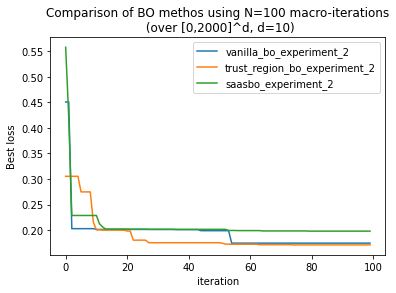

In [8]:

import matplotlib.pyplot as plt

# Plotting cumulative minimum
plt.plot(x_values_vanilla_bo, cumulative_min_vanilla_bo, label='vanilla_bo_experiment_2')
plt.plot(x_values_trust_region_bo,cumulative_min_trust_region_bo, label='trust_region_bo_experiment_2')
plt.plot(x_values_saasbo, cumulative_min_saasbo, label='saasbo_experiment_2')

# Adding labels and title
plt.xlabel('iteration')
plt.ylabel('Best loss')
plt.title('Comparison of BO methos using N=100 macro-iterations\n (over [0,2000]^d, d=10)')
plt.legend()  # Adding legend

# Display the plot
plt.show()